<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/JOBarcelona_%E2%80%9922_%7C_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
raw = pd.read_csv('/content/train (1).csv')

In [61]:
raw.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [62]:
len(raw)

7001

In [63]:
raw.isna().sum()

Unnamed: 0           0
Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

In [64]:
raw.describe()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,3500.00000,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,2021.15895,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,0.00000,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1750.00000,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,3500.00000,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,5250.00000,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,7000.00000,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


In [65]:
raw.Insect.value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

In [66]:
raw.dtypes
data = raw.copy()
data['Time'] = data['Hour']+ (data['Minutes']/60)

In [67]:
data = data[ ['Time'] + [ col for col in data.columns if col != 'Time' ] ]
data.head()

,Time,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22.433333,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10.266667,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21.700000,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21.283333,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18.266667,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [68]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('Hour', axis = 1)
data = data.drop('Minutes', axis = 1)

In [69]:
data.head()

,Time,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22.433333,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10.266667,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21.700000,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21.283333,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18.266667,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [72]:
data.dtypes

Time                 float64
Sensor_alpha         float64
Sensor_beta          float64
Sensor_gamma         float64
Sensor_alpha_plus    float64
Sensor_beta_plus     float64
Sensor_gamma_plus    float64
Insect                 int64
dtype: object

[Text(0.5, 1.0, 'Sensor_gamma_plus')]

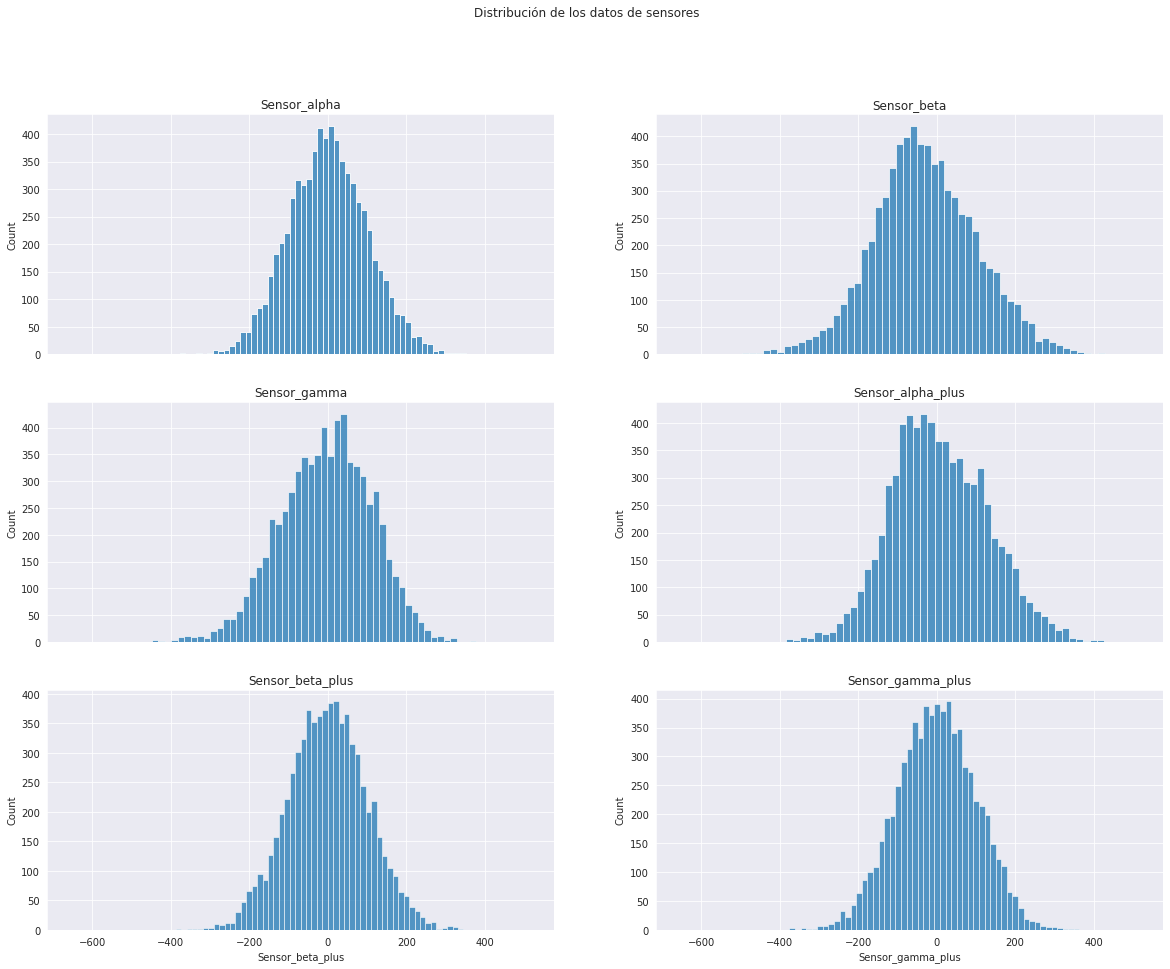

In [101]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(3, 2, sharex=True, figsize=(20,15))
figure.suptitle('Distribución de los datos de sensores')
sns.set_style("darkgrid")
sns.histplot(ax=axes[0, 0], data = data.Sensor_alpha).set(title = 'Sensor_alpha')
sns.histplot(ax=axes[0, 1], data = data.Sensor_beta).set(title = 'Sensor_beta')
sns.histplot(ax=axes[1, 0], data = data.Sensor_gamma).set(title = 'Sensor_gamma')
sns.histplot(ax=axes[1, 1], data = data.Sensor_alpha_plus).set(title = 'Sensor_alpha_plus')
sns.histplot(ax=axes[2, 0], data = data.Sensor_beta_plus).set(title = 'Sensor_beta_plus')
sns.histplot(ax=axes[2, 1], data = data.Sensor_gamma_plus).set(title = 'Sensor_gamma_plus')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


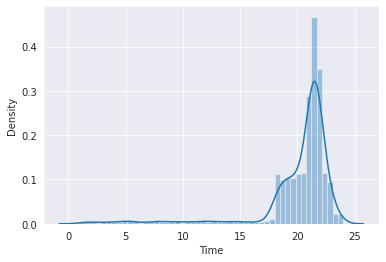

In [106]:
import seaborn as sns

sns.distplot(data.Time)

In [112]:
data.Insect.value_counts().index

Int64Index([0, 1, 2], dtype='int64')

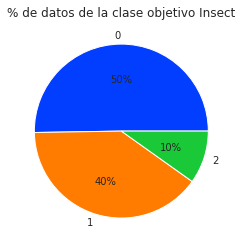

In [116]:
plt.title('% de datos de la clase objetivo Insect')
plt.pie(data.Insect.value_counts().values, labels = data.Insect.value_counts().index, colors = sns.color_palette('bright'), autopct = '%0.0f%%')
plt.show()

In [70]:
data.corr()

,Time,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
Time,1.000000,-0.004867,0.050913,0.010236,-0.069420,-0.011717,0.001987,0.084049
Sensor_alpha,-0.004867,1.000000,0.022326,0.006586,-0.018265,0.017574,0.004248,0.008430
Sensor_beta,0.050913,0.022326,1.000000,0.104676,-0.512785,0.010635,-0.022064,0.366754
Sensor_gamma,0.010236,0.006586,0.104676,1.000000,-0.005966,0.018890,0.000970,-0.121449
Sensor_alpha_plus,-0.069420,-0.018265,-0.512785,-0.005966,1.000000,-0.006376,0.015937,-0.397456
Sensor_beta_plus,-0.011717,0.017574,0.010635,0.018890,-0.006376,1.000000,0.017376,0.000202
Sensor_gamma_plus,0.001987,0.004248,-0.022064,0.000970,0.015937,0.017376,1.000000,-0.001430
Insect,0.084049,0.008430,0.366754,-0.121449,-0.397456,0.000202,-0.001430,1.000000


## Transformación y selección de Features

In [118]:
y = data['Insect']
X = data.drop(['Insect'], axis = 1)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4900, 7), (2101, 7), (4900,), (2101,))

In [123]:
X_train.head()

,Time,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
1139,19.000000,116.209884,-322.172559,-210.735465,165.390416,30.802344,148.579912
5666,21.983333,27.176290,-64.055675,-61.339867,-105.866894,-49.402872,190.438821
5824,22.350000,42.446730,25.811784,-54.292620,99.382971,28.343229,-32.503470
4467,21.633333,-206.838365,40.758073,74.271762,-41.102090,-70.246019,57.511765
2413,20.316667,-148.747072,6.395399,114.805635,184.579163,-185.155832,-49.361459


In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

from sklearn.metrics import f1_score
print(f1_score(y_test, knn_predictions,average = 'weighted'))

0.7867682056163732
[[846 181   3]
 [126 730   4]
 [ 79  55  77]]
0.7783127705782947


In [129]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 123, multi_class ='ovr')
model = logreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
accuracy2 = model.score(X_test, y_test)
print(accuracy2)
print(cm2)
print(f1_score(y_test, knn_predictions,average = 'weighted'))

0.7020466444550214
[[817 213   0]
 [216 628  16]
 [102  79  30]]
0.7783127705782947


In [130]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(max_depth=6, random_state = 0)
model =rf.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
accuracy3 = model.score(X_test, y_test)
print(accuracy3)
print(cm2)
print(f1_score(y_test, y_pred2,average = 'weighted'))

0.8043788672060923
[[941  86   3]
 [184 676   0]
 [103  35  73]]
0.7936816921664611


In [145]:
import xgboost as xgb

xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(X_train, y_train)
preds = xgb_clas.predict(X_test)

print(confusion_matrix(y_test, preds))
print(f1_score(y_test, preds ,average = 'weighted'))

[[917  95  18]
 [144 705  11]
 [ 60  23 128]]
0.8307887688008586


In [163]:
#hyperparameters for optimization
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.01],
    "gamma": [0, 0.1],
    "reg_lambda": [0, 0.1],
    "scale_pos_weight": [1, 2],
    "subsample": [0.8, 0.85],
    "colsample_bytree": [0.8, 0.85],
}

'''
learning_rate = ['0.01','2']
gamma = ['0','0.5']
reg_alpha = ['0','1']
subsample = ['0.5','0.9']
colsample_bytree = ['0.5','0.9']

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.01, 0.02, 0.04, 0.1, 0.3, 0.6, 1],
    "gamma": [0, 0.25, 0.5, 0.8, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.5, 0.7, 0.8],
}
'''

'\nlearning_rate = [\'0.01\',\'2\']\ngamma = [\'0\',\'0.5\']\nreg_alpha = [\'0\',\'1\']\nsubsample = [\'0.5\',\'0.9\']\ncolsample_bytree = [\'0.5\',\'0.9\']\n\nparam_grid = {\n    "max_depth": [3, 4, 5, 7],\n    "learning_rate": [0.01, 0.02, 0.04, 0.1, 0.3, 0.6, 1],\n    "gamma": [0, 0.25, 0.5, 0.8, 1],\n    "reg_lambda": [0, 1, 10],\n    "scale_pos_weight": [1, 3, 5],\n    "subsample": [0.6, 0.7, 0.8],\n    "colsample_bytree": [0.5, 0.7, 0.8],\n}\n'

In [164]:
from sklearn.model_selection import GridSearchCV

xgb_2 = xgb.XGBClassifier(objective ="multi:softmax", num_classes= 3)
xgb_2

XGBClassifier(num_classes=3, objective='multi:softmax')

In [165]:
grid_cv = GridSearchCV(xgb_2, param_grid, n_jobs = -1, cv = 3, scoring = 'f1_weighted')

In [166]:
_ = grid_cv.fit(X_train, y_train)

In [167]:
grid_cv.best_score_

0.8719226442868191

In [168]:
grid_cv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, digits = 4))

              precision    recall  f1-score   support

           0     0.8180    0.8903    0.8526      1030
           1     0.8566    0.8198    0.8378       860
           2     0.8153    0.6066    0.6957       211

    accuracy                         0.8329      2101
   macro avg     0.8300    0.7722    0.7954      2101
weighted avg     0.8335    0.8329    0.8308      2101

